Métricas para fatorial_recursivo 20:
Percentual do tempo total gasto pela CPU: 1.18
MIPS: 682.60
MFLOPS: 1031.99
Tempo de CPU: 0.000541 segundos
Performance: 1214.742110

Métricas para fatorial_iterativo 20:
Percentual do tempo total gasto pela CPU: 1.05
MIPS: 833.61
MFLOPS: 1222.49
Tempo de CPU: 0.000529 segundos
Performance: 1284.985332

Métricas para fatorial_recursivo 21:
Percentual do tempo total gasto pela CPU: 1.11
MIPS: 802.22
MFLOPS: 1177.86
Tempo de CPU: 0.000531 segundos
Performance: 1305.280250

Métricas para fatorial_iterativo 21:
Percentual do tempo total gasto pela CPU: 0.74
MIPS: 763.74
MFLOPS: 1108.65
Tempo de CPU: 0.000547 segundos
Performance: 819.785692

Métricas para fatorial_recursivo 22:
Percentual do tempo total gasto pela CPU: 0.82
MIPS: 777.99
MFLOPS: 1177.86
Tempo de CPU: 0.000519 segundos
Performance: 966.626262

Métricas para fatorial_iterativo 22:
Percentual do tempo total gasto pela CPU: 1.10
MIPS: 768.72
MFLOPS: 1129.94
Tempo de CPU: 0.000541 segundos
Pe

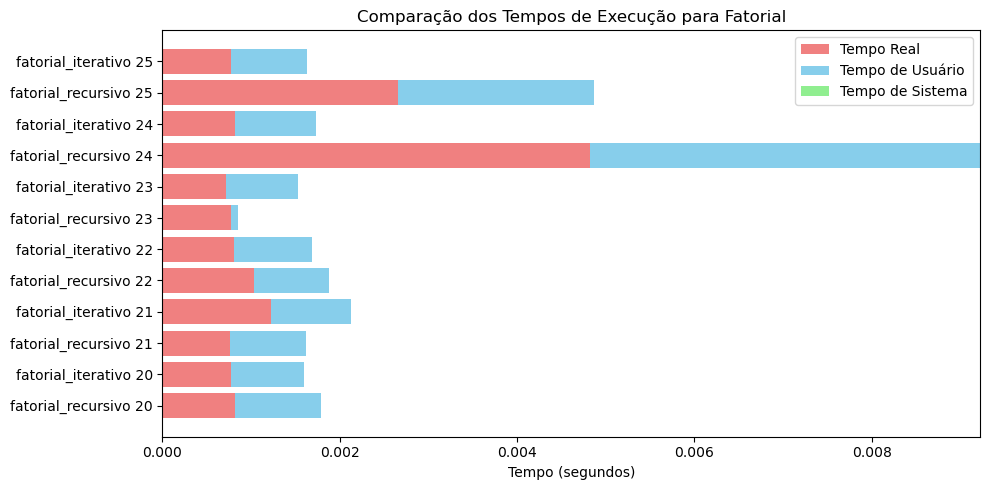

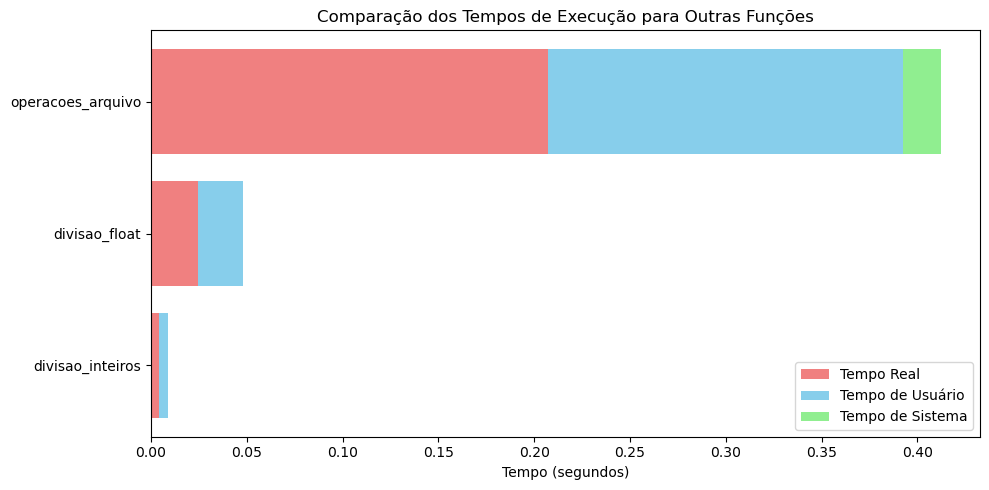

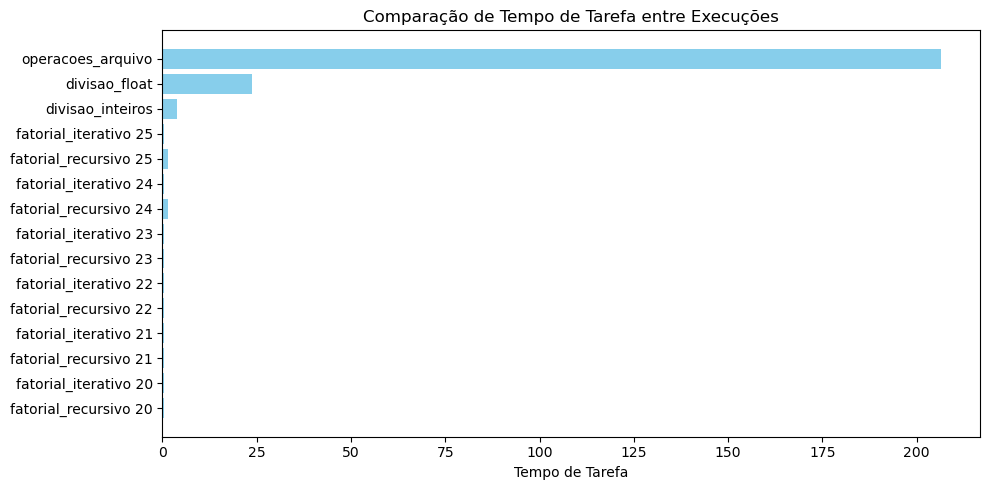

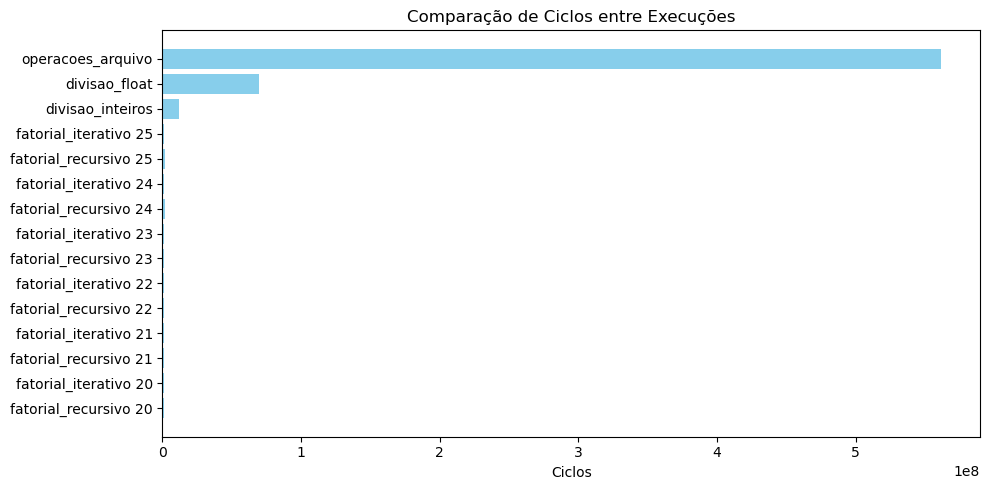

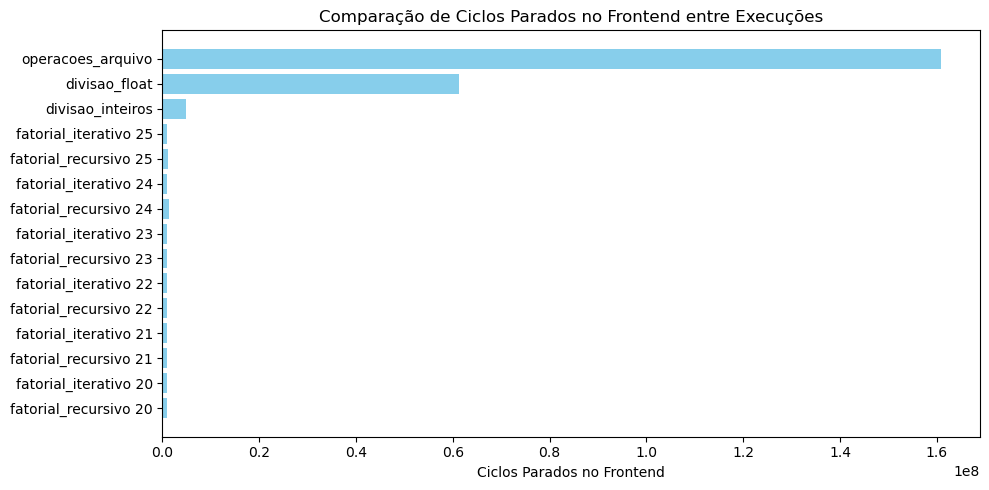

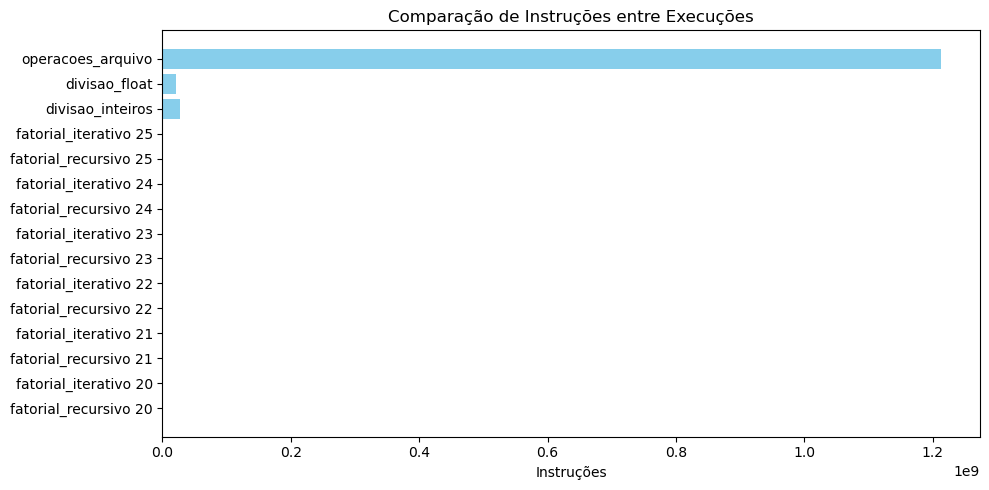

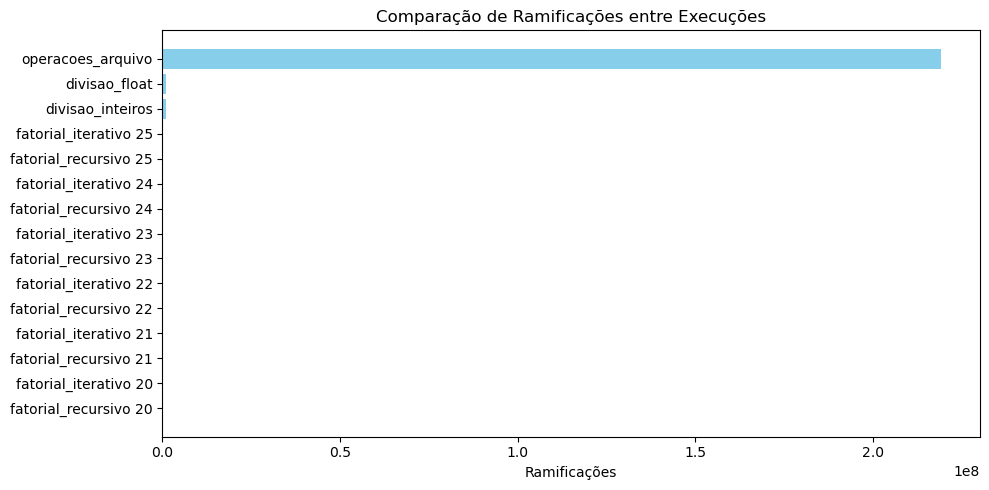

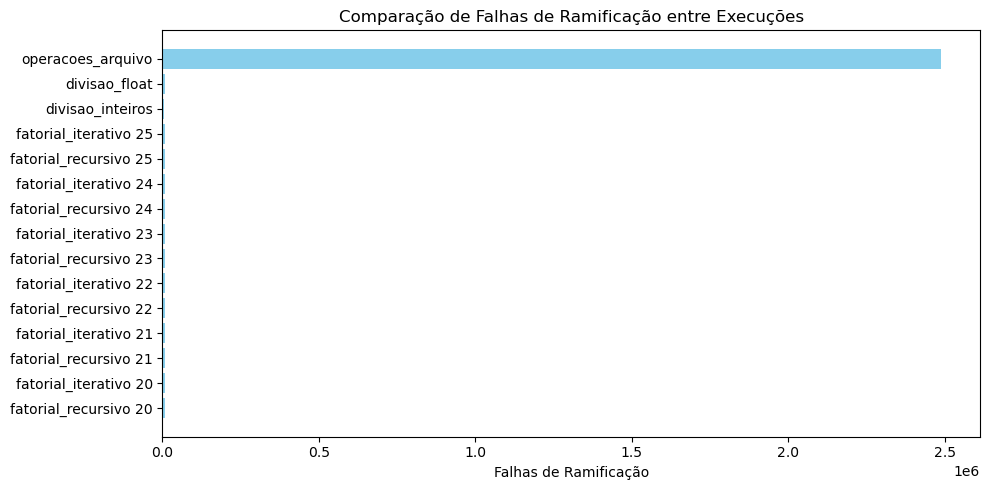

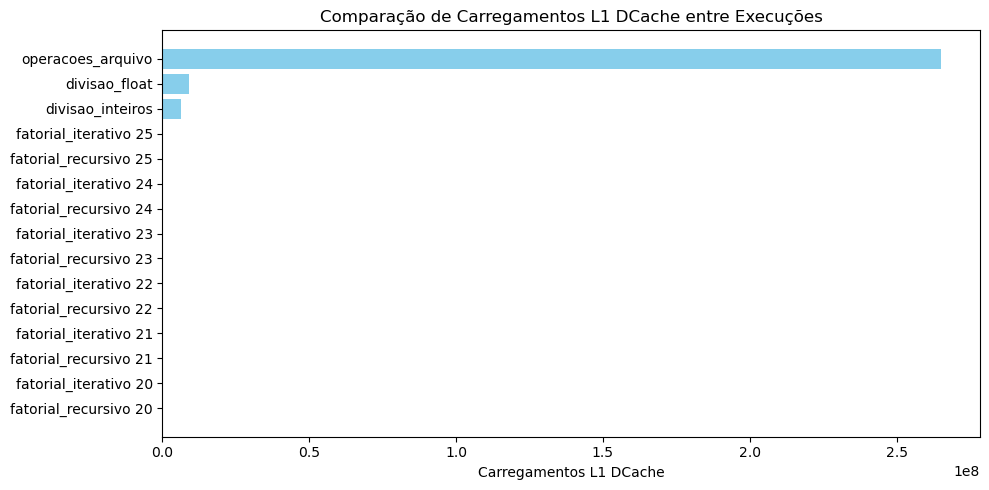

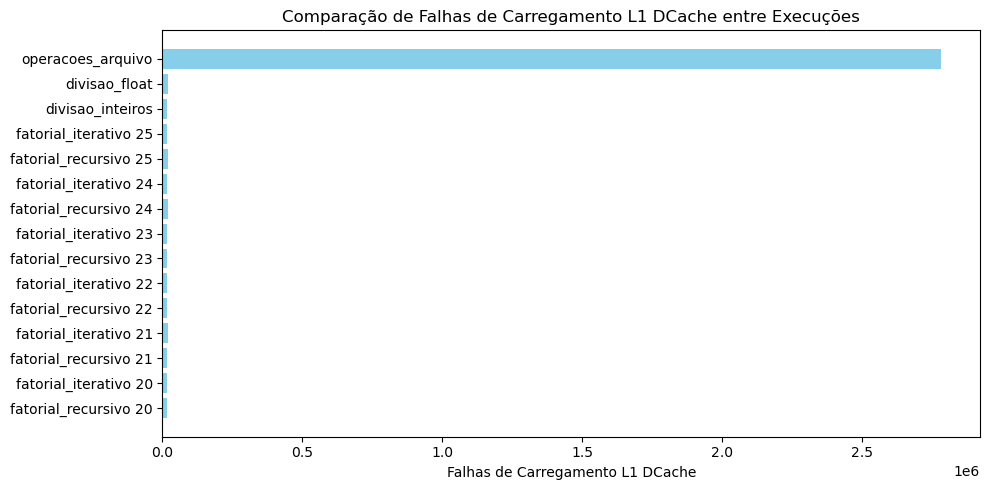

In [1]:
import json
import matplotlib.pyplot as plt

# Carregar os dados do JSON atualizado
with open('DockerRun.json') as f:
    data = json.load(f)

# Extrair dados
executions = data['executions']
metrics = ['task_clock', 'cycles', 'stalled_cycles_frontend', 'instructions', 'branches', 'branch_misses', 'l1_dcache_loads', 'l1_dcache_load_misses']

# Organizar dados por métrica
metrics_data = {metric: [] for metric in metrics}
names = []
real_times = []
user_times = []
sys_times = []

for execution in executions:
    names.append(f"{execution['name']} {execution.get('input', '')}".strip())
    real_time_str = execution['real_time']
    user_time_str = execution['user_time']
    sys_time_str = execution['sys_time']
    real_times.append(float(real_time_str.split()[0]))
    user_times.append(float(user_time_str.split()[0]))
    sys_times.append(float(sys_time_str.split()[0]))
    for metric in metrics:
        value_str = execution['perf_output'][metric]
        value = float(value_str.split()[0].replace(',', ''))
        metrics_data[metric].append(value)

# Traduzir nomes das métricas
metric_translations = {
    'task_clock': 'Tempo de Tarefa',
    'cycles': 'Ciclos',
    'stalled_cycles_frontend': 'Ciclos Parados no Frontend',
    'instructions': 'Instruções',
    'branches': 'Ramificações',
    'branch_misses': 'Falhas de Ramificação',
    'l1_dcache_loads': 'Carregamentos L1 DCache',
    'l1_dcache_load_misses': 'Falhas de Carregamento L1 DCache'
}

# Cálculo das métricas adicionais
def calculate_metrics(execution, real_time, user_time, sys_time):
    instructions = float(execution['perf_output']['instructions'].split()[0].replace(',', ''))
    cycles = float(execution['perf_output']['cycles'].split()[0].replace(',', ''))
    
    # Assumindo frequência do clock em Hz (ex: 2.5GHz = 2.5 * 10^9 Hz)
    clock_frequency = 2.5 * 10**9 
    
    # Tempo de CPU
    cpu_time = cycles / clock_frequency

    # Percentual do tempo total gasto pela CPU no programa
    total_cpu_time = user_time + sys_time
    percent_cpu_time = total_cpu_time / real_time

    # MIPS
    mips = (instructions / total_cpu_time) / 10**6

    # Assumindo um número fictício de operações de ponto flutuante
    floating_point_operations = 10**6 
    mflops = (floating_point_operations / total_cpu_time) / 10**6

    # Performance
    performance = 1 / real_time

    return percent_cpu_time, mips, mflops, cpu_time, performance

# Calcular e exibir métricas para cada execução
for i, execution in enumerate(executions):
    real_time = real_times[i]
    user_time = user_times[i]
    sys_time = sys_times[i]
    percent_cpu_time, mips, mflops, cpu_time, performance = calculate_metrics(execution, real_time, user_time, sys_time)

    print(f"Métricas para {names[i]}:")
    print(f"Percentual do tempo total gasto pela CPU: {percent_cpu_time:.2f}")
    print(f"MIPS: {mips:.2f}")
    print(f"MFLOPS: {mflops:.2f}")
    print(f"Tempo de CPU: {cpu_time:.6f} segundos")
    print(f"Performance: {performance:.6f}")
    print()

# Separar execuções de fatorial e outras
factorial_indices = [i for i, name in enumerate(names) if 'fatorial' in name]
other_indices = [i for i, name in enumerate(names) if 'fatorial' not in name]

factorial_names = [names[i] for i in factorial_indices]
factorial_real_times = [real_times[i] for i in factorial_indices]
factorial_user_times = [user_times[i] for i in factorial_indices]
factorial_sys_times = [sys_times[i] for i in factorial_indices]

other_names = [names[i] for i in other_indices]
other_real_times = [real_times[i] for i in other_indices]
other_user_times = [user_times[i] for i in other_indices]
other_sys_times = [sys_times[i] for i in other_indices]

# Plotar tempos de execução para funções de fatorial
plt.figure(figsize=(10, 5))
plt.barh(factorial_names, factorial_real_times, color='lightcoral', label='Tempo Real')
plt.barh(factorial_names, factorial_user_times, color='skyblue', label='Tempo de Usuário', left=factorial_real_times)
plt.barh(factorial_names, factorial_sys_times, color='lightgreen', label='Tempo de Sistema', left=[r + u for r, u in zip(factorial_real_times, factorial_user_times)])
plt.xlabel('Tempo (segundos)')
plt.title('Comparação dos Tempos de Execução para Fatorial')
plt.legend()
plt.tight_layout()
plt.show()

# Plotar tempos de execução para outras funções
plt.figure(figsize=(10, 5))
plt.barh(other_names, other_real_times, color='lightcoral', label='Tempo Real')
plt.barh(other_names, other_user_times, color='skyblue', label='Tempo de Usuário', left=other_real_times)
plt.barh(other_names, other_sys_times, color='lightgreen', label='Tempo de Sistema', left=[r + u for r, u in zip(other_real_times, other_user_times)])
plt.xlabel('Tempo (segundos)')
plt.title('Comparação dos Tempos de Execução para Outras Funções')
plt.legend()
plt.tight_layout()
plt.show()

# Plotar cada métrica
for metric, values in metrics_data.items():
    plt.figure(figsize=(10, 5))
    plt.barh(names, values, color='skyblue')
    plt.xlabel(metric_translations[metric])
    plt.title(f'Comparação de {metric_translations[metric]} entre Execuções')
    plt.tight_layout()
    plt.show()
